# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline
# jtplot.style(theme='monokai')

In [2]:
cd galvanize_dsi_capstone/

[Errno 2] No such file or directory: 'galvanize_dsi_capstone/'
/Users/Katie/Desktop/Galvanize/Full_Course/Capstone/galvanize_dsi_capstone


In [3]:
nov_28_df = pd.read_json('11-28.json')
nov_29_df = pd.read_json('11-29.json')
nov_30_df = pd.read_json('11-30 redo.json')
nov_30_df_2 = pd.read_json('11-30_2.json')

nov_30_concat = pd.concat([nov_30_df, nov_30_df_2], ignore_index=True)
nov_30_concat = nov_30_concat.drop_duplicates()
nov_30_concat_df = nov_30_concat.sort_values(by=['timestamp'])

dec_1_df = pd.read_json('12-1.json')
dec_2_df = pd.read_json('12-2.json')
dec_3_df = pd.read_json('12-3.json')

dec_4_df = pd.read_json('12-4 redo.json')
dec_4_df_2 = pd.read_json('12-4_2.json')

dec_4_concat = pd.concat([dec_4_df, dec_4_df_2], ignore_index=True)
dec_4_concat = dec_4_concat.drop_duplicates()
dec_4_concat_df = dec_4_concat.sort_values(by=['timestamp'])

dec_5_df = pd.read_json('12-5.json')
dec_6_df = pd.read_json('12-6.json')
dec_7_df = pd.read_json('12-7.json')

dec_8_df = pd.read_json('12-8.json')
dec_8_df_2 = pd.read_json('12-8_2.json')

dec_8_concat = pd.concat([dec_8_df, dec_8_df_2], ignore_index=True)
dec_8_concat = dec_8_concat.drop_duplicates()
dec_8_concat_df = dec_8_concat.sort_values(by=['timestamp'])

dec_9_df = pd.read_json('12-9.json')
dec_9_df_2 = pd.read_json('12-9_2.json')

dec_9_concat = pd.concat([dec_9_df, dec_9_df_2], ignore_index=True)
dec_9_concat = dec_9_concat.drop_duplicates()
dec_9_concat_df = dec_9_concat.sort_values(by=['timestamp'])

dec_10_df = pd.read_json('12-10.json')
dec_11_df = pd.read_json('12-11.json')
dec_12_df = pd.read_json('12-12.json')
dec_13_df = pd.read_json('12-13.json')
dec_14_df = pd.read_json('12-14.json')

In [4]:
mega_df = pd.concat([nov_28_df, nov_29_df, nov_30_concat_df, dec_1_df, dec_2_df, dec_3_df, \
                    dec_4_concat_df, dec_5_df, dec_6_df, dec_7_df, dec_8_concat_df, dec_9_concat_df, \
                    dec_10_df, dec_11_df, dec_12_df, dec_13_df, dec_14_df], ignore_index=True)

In [5]:
mega_df.describe()

,id,likes,replies,retweets
count,4.193430e+05,419343.000000,419343.000000,419343.000000
mean,9.393097e+17,6.223788,0.206325,4.391949
std,1.750021e+15,415.162837,9.443255,304.453924
min,9.352972e+17,0.000000,0.000000,0.000000
25%,9.381515e+17,0.000000,0.000000,0.000000
50%,9.399272e+17,0.000000,0.000000,0.000000
75%,9.409810e+17,1.000000,0.000000,0.000000
max,9.414578e+17,216270.000000,3694.000000,165604.000000


# Data Cleaning

In [6]:
# Function to be used in apply - returns properly formatted hashtags other than #netneutrality

import re, string

def get_hashtags(text):
    hashtags = []
    for t in text.lower().split():
        if (t.startswith("#")) & (t != '#netneutrality'):
            result = re.findall('#[\w_]+', t)
            for x in result:
                hashtags.append(x)
    return hashtags

In [7]:
# Function to be used in apply - returns links

def get_links(text):
    links = []
    for t in text.lower().split():
        if t.startswith("http"):
            links.append(t)
    return links

In [8]:
# Function to be used in apply - returns mentions of other users

def get_mentions(text):
    mentions = []
    for t in text.lower().split():
        if t.startswith("@"):
            if t.endswith("'s"):
                t = t[:-2]
            mentions.append(t)
    return mentions

In [9]:
mega_df["other_hashtags"] = mega_df["text"].apply(get_hashtags)
mega_df["links"] = mega_df["text"].apply(get_links)
mega_df["@s"] = mega_df["text"].apply(get_mentions)

## Identifying guided information campaigns

In [10]:
# Create Counter that will tally up the number of times text appears in tweets

from collections import Counter
tweet_text_dict = Counter()

for item in mega_df['text']:
        tweet_text_dict[item] += 1

In [11]:
len(tweet_text_dict)

186764

In [12]:
# Create set of those repeated tweets that showed up 100 or more times in the data. These are the ones I am 
# classifying as large information campaigns.

lg_campaign_tweet_set = set()

for k, v in tweet_text_dict.items():
    if v > 99:
        lg_campaign_tweet_set.add(k)

In [13]:
len(lg_campaign_tweet_set)

75

In [14]:
# Create set of those repeated tweets that showed up 1 time in the data. These are the ones I am 
# classifying as original tweets. It is possible that some of the ones that show up between 2-99 times are original
# tweets that have been retweeted, but I would prefer to miss some original tweets than classify some campaigns as
# original.

orig_tweet_set_small = set()

for k, v in tweet_text_dict.items():
    if v == 1:
        orig_tweet_set_small.add(k)

In [15]:
len(orig_tweet_set_small)

179970

In [16]:
# Time to go through and manually remove things that should not be in the large set.

lg_campaign_tweet_set

{'#ArtificialIntelligence #AI #Industry40 #MachineLearning #DeepLearning #GrowthHacking #BigData #BehavioralEconomics #fintech #BlockChain #HealthTech #netneutrality #GMOFREEHAWAII #ALOHA #HAWAII #SURF #EDDIEWOULDGO #CROWDFUNDING #CHEMTRAILS #BITCOIN #IOT #SOCIALMEDIA',
 '#BreakTheInternet to #StopTheFCC and save #NetNeutrality. Sign up here to join: http://BreakTheInternetProtest.org\xa0',
 '#NetNeutrality',
 '#NetNeutrality dies in 2 days unless we stop this.\n\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766\nCall Congress now: 202-759-7766',
 '#NetNeutrality dies in 2 days unless we stop this.\n\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0\nContact Congress now: http://battleforthenet.com\xa0',
 '#NetNeutrality dies in 2

In [17]:
# Fortunately I only found one, and it appears to be one person tweeting the same thing 113 times.

lg_campaign_tweet_set.remove('#ArtificialIntelligence #AI #Industry40 #MachineLearning #DeepLearning #GrowthHacking #BigData #BehavioralEconomics #fintech #BlockChain #HealthTech #netneutrality #GMOFREEHAWAII #ALOHA #HAWAII #SURF #EDDIEWOULDGO #CROWDFUNDING #CHEMTRAILS #BITCOIN #IOT #SOCIALMEDIA')

In [18]:
mega_df[mega_df['text'] == '#ArtificialIntelligence #AI #Industry40 #MachineLearning #DeepLearning #GrowthHacking \
#BigData #BehavioralEconomics #fintech #BlockChain #HealthTech #netneutrality #GMOFREEHAWAII #ALOHA #HAWAII #SURF \
#EDDIEWOULDGO #CROWDFUNDING #CHEMTRAILS #BITCOIN #IOT #SOCIALMEDIA']

,fullname,id,likes,replies,retweets,text,timestamp,url,user,other_hashtags,links,@s
43,Frank Canete,935298001668415488,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:03:15,/HawaiianKiko12/status/935298001668415488,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
55,Frank Canete,935298288953131008,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:04:23,/HawaiianKiko12/status/935298288953131009,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
65,Frank Canete,935298445702602752,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:05:01,/HawaiianKiko12/status/935298445702602753,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
90,Frank Canete,935298910230265856,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:06:51,/HawaiianKiko12/status/935298910230265856,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
106,Frank Canete,935299175180222464,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:07:55,/HawaiianKiko12/status/935299175180222464,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
126,Frank Canete,935299446278995968,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:08:59,/HawaiianKiko12/status/935299446278995968,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
140,Frank Canete,935299600180699136,1,0,1,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:09:36,/HawaiianKiko12/status/935299600180699136,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
156,Frank Canete,935299783576580096,1,0,0,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 00:10:20,/HawaiianKiko12/status/935299783576580096,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
3432,Frank Canete,935380718787616768,1,0,2,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 05:31:56,/HawaiianKiko12/status/935380718787616768,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]
3434,Frank Canete,935380840309125120,0,0,0,#ArtificialIntelligence #AI #Industry40 #Machi...,2017-11-28 05:32:25,/HawaiianKiko12/status/935380840309125120,HawaiianKiko12,"[#artificialintelligence, #ai, #industry40, #m...",[],[]


In [19]:
def info_campaign(text):
    if text in lg_campaign_tweet_set:
        return 1
    else:
        return 0

In [20]:
def original_tweet(text):
    if text in orig_tweet_set_small:
        return 1
    else:
        return 0

In [21]:
# Create new columns using above functions

mega_df['info_campaign'] = mega_df['text'].apply(info_campaign)
mega_df['original_tweet'] = mega_df['text'].apply(original_tweet)

In [22]:
mega_df.head()

,fullname,id,likes,replies,retweets,text,timestamp,url,user,other_hashtags,links,@s,info_campaign,original_tweet
0,Jake Suellentrop,935297188426649600,0,0,0,@SenPatRoberts Killing net neutrality is killi...,2017-11-28 00:00:01,/jakesuellentrop/status/935297188426649600,jakesuellentrop,[],[],[@senpatroberts],0,0
1,Jim McGrath,935297192302059520,0,0,0,"#NetNeutrality affects the internet, which aff...",2017-11-28 00:00:02,/FrDougal9000/status/935297192302059520,FrDougal9000,[],[https://www.battleforthenet.com/],[],0,1
2,Kevin C. Bell,935297193484754944,0,0,0,> #NetNeutrality is an #IoT & #5G issue too -h...,2017-11-28 00:00:02,/Kevin_C_Bell/status/935297193484754945,Kevin_C_Bell,"[#iot, #5g]",[],[],0,1
3,Matan Karasov,935297194730586112,0,0,0,"So the @FCC won't let me be\nOr let me be me, ...",2017-11-28 00:00:02,/MKarasov/status/935297194730586112,MKarasov,[],[],[@fcc],0,1
4,Robert Greenwald,935297198170009600,1,0,0,Call the FCC to fight net neutrality repeal! H...,2017-11-28 00:00:03,/robertgreenwald/status/935297198170009600,robertgreenwald,"[#fcc, #internet]",[http://bit.ly/2nacw4x],[],0,0


## Get to work seeing if there are any tweets in here that appear to be pro-repeal of net neutrality

In [23]:
# Function to be used in apply - labels tweets that appear to be pro-repeal of net neutrality

def negative_tweet_grab(other_hashtags):
    hashtag_list = ['#notonetneutrality', '#nonetneutrality', '#maga', '#trumptrain', '#libtard', '#presidenttrump',\
                   '#presidentdonaldtrump', '#makeamericagreatagain', '#draintheswamp', '#deplorables', '#soros', '#tcot',\
                   '#tgdn', '#gabfam', '#sjw', '#RestoreInternetFreedom', '#RestoringInternetFreedomOrder', '#IdiotDems',\
                   '#obama']
# Possibly return to this later to add some users to the pro-repeal classification
#     links = ['https://www.youtube.com/watch?v=mIYvQjaT8po', 'https://www.rushlimbaugh.com', 'http://www.infowars.com']
    if len(other_hashtags) > 0:
        for hashtag in other_hashtags:
            if hashtag in hashtag_list:
                return 1
        else:
            return 0
    else:
        return 0

In [24]:
mega_df['pro_repeal'] = mega_df['other_hashtags'].apply(negative_tweet_grab)

In [25]:
# Create array of usernames that were classified as 'pro-repeal'

pro_repeal_users = mega_df['user'][mega_df['pro_repeal'] == 1]
pro_repeal_users_unique = mega_df['user'][mega_df['pro_repeal'] == 1].unique()

In [26]:
# Narrow down to unique users who tweeted more than once over this period. These are the users I will be looking at \
# with the Twitter API later.

# repeal_df = mega_df[mega_df['pro_repeal'] == 1]
# mask = repeal_df["user"].value_counts().values > 1
# multi_post_repeal_users = repeal_df["user"].value_counts()[mask].index
# multi_post_repeal_user_df = pro_mega_df[pro_mega_df["user"].isin(multi_post_users)]

## Ok, now let's split the data into 3 categories:
### * Guided information campaign tweets
### * Original tweets (only showed up one time)
### * Tweets that appear to be pro-repeal of net neutrality that still used #netneutrality 

In [27]:
campaign_tweets_df = mega_df[(mega_df['info_campaign'] == 1)]
original_tweets_df = mega_df[(mega_df['original_tweet'] == 1) & (mega_df['pro_repeal'] == 0)]

# All of the tweets in this category are determined to be original - there were not any that were classified as \
# pro-repeal and part of an information campaign. The total number of pro-repeal tweets is low.
repeal_tweets_df = mega_df[(mega_df['pro_repeal'] == 1) & (mega_df['original_tweet'] == 1)]

In [28]:
original_total = mega_df['fullname'].count()
new_total = (campaign_tweets_df['fullname'].count()) + (original_tweets_df['fullname'].count()) + \
(repeal_tweets_df['fullname'].count())

# This removed a total of 7.72% of my data since I was not confident in how to classify it as an information campaign
# or original tweet.
print(((original_total-new_total) / original_total) *100)

7.75546509659


## Some EDA

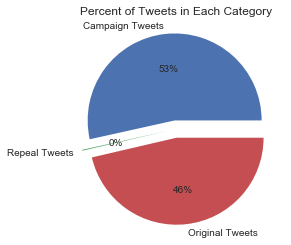

In [29]:
# For my final dataset, what was the breakdown between these three categories?
total_tweets = campaign_tweets_df['fullname'].count() + repeal_tweets_df['fullname'].count() + original_tweets_df['fullname'].count()
percentages = [str(campaign_tweets_df['fullname'].count()/total_tweets), str(repeal_tweets_df['fullname'].count()/total_tweets), \
         str(original_tweets_df['fullname'].count()/total_tweets)]

plt.axes(aspect='equal')
plt.pie([campaign_tweets_df['fullname'].count(), repeal_tweets_df['fullname'].count(), \
         original_tweets_df['fullname'].count()], explode=[.1, .1 , .1], \
        labels=['Campaign Tweets', 'Repeal Tweets', 'Original Tweets'], autopct='%1.0f%%')
plt.title('Percent of Tweets in Each Category')
plt.show()

In [30]:
mega_df['retweets'].describe()

count    419343.000000
mean          4.391949
std         304.453924
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      165604.000000
Name: retweets, dtype: float64

In [31]:
# Count of retweets with outliers removed

retweets_outliers_rmv = mega_df['retweets'][np.abs(mega_df['retweets']-mega_df['retweets'].mean())<=(3*mega_df['retweets'].std())]

In [32]:
retweets_outliers_rmv.describe()

count    419079.000000
mean          1.725305
std          20.391295
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         914.000000
Name: retweets, dtype: float64

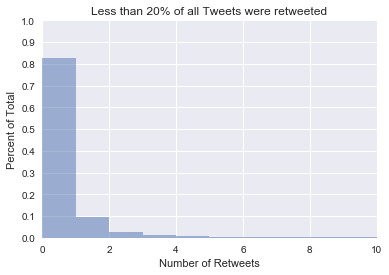

In [33]:
ticks = np.linspace(0,1, 11)

plt.hist(retweets_outliers_rmv, alpha=.5, bins = retweets_outliers_rmv.max(), normed=True)
plt.xlabel('Number of Retweets')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 20% of all Tweets were retweeted')
plt.xlim(0,10)
plt.show()

In [34]:
mega_df['likes'].describe()

count    419343.000000
mean          6.223788
std         415.162837
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max      216270.000000
Name: likes, dtype: float64

In [35]:
likes_outliers_rmv = mega_df['likes'][np.abs(mega_df['likes']-mega_df['likes'].mean())<=(3*mega_df['likes'].std())]

In [36]:
likes_outliers_rmv.describe()

count    419094.000000
mean          2.508005
std          27.597839
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1246.000000
Name: likes, dtype: float64

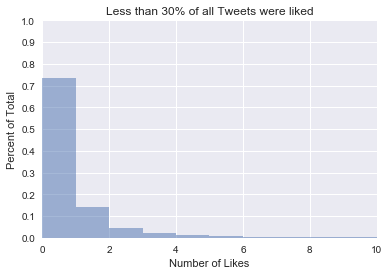

In [37]:
ticks = np.linspace(0,1, 11)

plt.hist(likes_outliers_rmv, alpha=.5, bins = likes_outliers_rmv.max(), normed=True)
plt.xlabel('Number of Likes')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 30% of all Tweets were liked')
plt.xlim(0,10)
plt.show()

In [38]:
mega_df['replies'].describe()

count    419343.000000
mean          0.206325
std           9.443255
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3694.000000
Name: replies, dtype: float64

In [39]:
replies_outliers_rmv = mega_df['replies'][np.abs(mega_df['replies']-mega_df['replies'].mean())<=\
                                          (3*mega_df['replies'].std())]

In [40]:
replies_outliers_rmv.describe()

count    419030.000000
mean          0.103826
std           0.789727
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: replies, dtype: float64

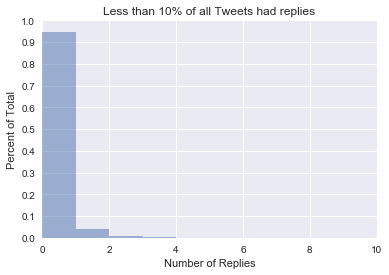

In [41]:
ticks = np.linspace(0,1, 11)

plt.hist(replies_outliers_rmv, bins = replies_outliers_rmv.max(), alpha=.5, normed=True)
plt.xlabel('Number of Replies')
plt.ylabel('Percent of Total')
plt.yticks(ticks)
plt.title('Less than 10% of all Tweets had replies')
plt.xlim(0,10)
plt.show()

## Time to compare the different categories

In [42]:
# Original tweets

orig_retweets_outliers_rmv = original_tweets_df['retweets'][np.abs(original_tweets_df['retweets']-original_tweets_df['retweets']\
                                                                   .mean())<=(3*original_tweets_df['retweets'].std())]
orig_likes_outliers_rmv = original_tweets_df['likes'][np.abs(original_tweets_df['likes']-original_tweets_df['likes']\
                                                                   .mean())<=(3*original_tweets_df['likes'].std())]
orig_replies_outliers_rmv = original_tweets_df['replies'][np.abs(original_tweets_df['replies']-original_tweets_df['replies']\
                                                                   .mean())<=(3*original_tweets_df['replies'].std())]

In [43]:
# Campaign tweets

campaign_retweets_outliers_rmv = campaign_tweets_df['retweets'][np.abs(campaign_tweets_df['retweets']-campaign_tweets_df['retweets']\
                                                                       .mean())<=(3*campaign_tweets_df['retweets'].std())]
campaign_likes_outliers_rmv = campaign_tweets_df['likes'][np.abs(campaign_tweets_df['likes']-campaign_tweets_df['likes']\
                                                                       .mean())<=(3*campaign_tweets_df['likes'].std())]
campaign_replies_outliers_rmv = campaign_tweets_df['replies'][np.abs(campaign_tweets_df['replies']-campaign_tweets_df['replies']\
                                                                       .mean())<=(3*campaign_tweets_df['replies'].std())]

In [44]:
# Repeal tweets

repeal_retweets_outliers_rmv = repeal_tweets_df['retweets'][np.abs(repeal_tweets_df['retweets']-repeal_tweets_df['retweets']\
                                                   .mean())<=(3*repeal_tweets_df['retweets'].std())]
repeal_likes_outliers_rmv = repeal_tweets_df['likes'][np.abs(repeal_tweets_df['likes']-repeal_tweets_df['likes']\
                                                   .mean())<=(3*repeal_tweets_df['likes'].std())]
repeal_replies_outliers_rmv = repeal_tweets_df['replies'][np.abs(repeal_tweets_df['replies']-repeal_tweets_df['replies']\
                                                   .mean())<=(3*repeal_tweets_df['replies'].std())]

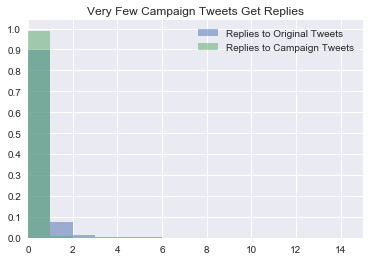

In [45]:
ticks = np.linspace(0,1, 11)
bins_x = orig_replies_outliers_rmv.max()
bins_y = campaign_replies_outliers_rmv.max()

x = orig_replies_outliers_rmv
y = campaign_replies_outliers_rmv

plt.hist(x, alpha=0.5, bins=bins_x, label='Replies to Original Tweets', normed=1)
plt.hist(y, alpha=0.5, bins=bins_y, label='Replies to Campaign Tweets', normed=1)
plt.yticks(ticks)
plt.xlim(0, 15)
plt.legend(loc='upper right')
plt.title('Very Few Campaign Tweets Get Replies')
plt.show()

In [46]:
original_replies = (original_tweets_df[original_tweets_df['replies'] != 0]['fullname'].count() / len(original_tweets_df['replies'])) * 100
campaign_replies = (campaign_tweets_df[campaign_tweets_df['replies'] != 0]['fullname'].count() / len(campaign_tweets_df['replies'])) * 100

print('Of all original tweets in the data, {:0.2f}% had a reply.'.format(original_replies))
print('Of all campaign tweets in the data, {:0.2f}% had a reply.'.format(campaign_replies))

Of all original tweets in the data, 10.35% had a reply.
Of all campaign tweets in the data, 1.09% had a reply.


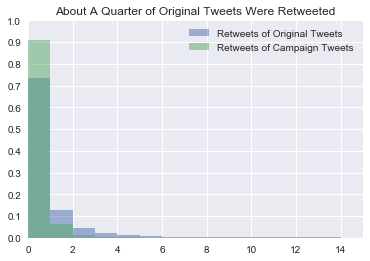

In [47]:
ticks = np.linspace(0,1, 11)
bins_x = orig_retweets_outliers_rmv.max()
bins_y = campaign_retweets_outliers_rmv.max()
x = orig_retweets_outliers_rmv
y = campaign_retweets_outliers_rmv

plt.hist(x, alpha=0.5, bins=bins_x, label='Retweets of Original Tweets', normed=1)
plt.hist(y, alpha=0.5, bins=bins_y, label='Retweets of Campaign Tweets', normed=1)
plt.yticks(ticks)
plt.xlim(0, 15)
plt.legend(loc='upper right')
plt.title('About A Quarter of Original Tweets Were Retweeted')
plt.show()

In [48]:
original_retweets = (original_tweets_df[original_tweets_df['retweets'] != 0]['fullname'].count() / len(original_tweets_df['retweets'])) * 100
campaign_retweets = (campaign_tweets_df[campaign_tweets_df['retweets'] != 0]['fullname'].count() / len(campaign_tweets_df['retweets'])) * 100

print('Of all original tweets in the data, {:0.2f}% were retweeted.'.format(original_retweets))
print('Of all campaign tweets in the data, {:0.2f}% were retweeted.'.format(campaign_retweets))

Of all original tweets in the data, 26.77% were retweeted.
Of all campaign tweets in the data, 9.19% were retweeted.


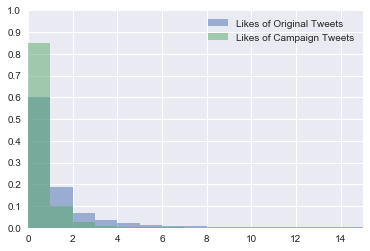

In [49]:
ticks = np.linspace(0,1, 11)
bins_x = orig_likes_outliers_rmv.max()
bins_y = campaign_likes_outliers_rmv.max()
x = orig_likes_outliers_rmv
y = campaign_likes_outliers_rmv

plt.hist(x, alpha=0.5, bins=bins_x, label='Likes of Original Tweets', normed=1)
plt.hist(y, alpha=0.5, bins=bins_y, label='Likes of Campaign Tweets', normed=1)
plt.yticks(ticks)
plt.xlim(0, 15)
plt.legend(loc='upper right')
plt.title('')
plt.show()

In [50]:
original_likes = (original_tweets_df[original_tweets_df['likes'] != 0]['fullname'].count() / len(original_tweets_df['likes'])) * 100
campaign_likes = (campaign_tweets_df[campaign_tweets_df['likes'] != 0]['fullname'].count() / len(campaign_tweets_df['likes'])) * 100

print('Of all original tweets in the data, {:0.2f}% got likes.'.format(original_likes))
print('Of all campaign tweets in the data, {:0.2f}% got likes.'.format(campaign_likes))

Of all original tweets in the data, 39.76% got likes.
Of all campaign tweets in the data, 14.97% got likes.


## Remove all but alphanumeric text using RegEx

In [51]:
# This will need to remove hashtags, @s, and links as well.

import re
import string

samp_str = 'Testing some Spacy shit. Man do I love that spicy @Spacy. What a big sexy tool! 69 time.'

# str = re.sub('[A-Z0-9]', '', str)
# str = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str).split())
# translator = str.maketrans('', '', string.punctuation)
# print(samp_str.translate(translator))

def clean_text(text):
    cleaned = re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|(\w+:\/\/\S+)|(\\n)|(\\xa0)|([0-9])", '', text).lower()
    translator = str.maketrans('', '', string.punctuation)
    cleaned = cleaned.translate(translator).strip()
    return cleaned

In [52]:
small_slice = mega_df[:50]

In [53]:
mega_df['cleaned_text'] = mega_df['text'].apply(clean_text)

In [54]:
small_slice['cleaned_text'] = small_slice['text'].apply(clean_text)

/Users/Katie/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Start doing some NLP

In [55]:
import spacy

nlp = spacy.load('en_core_web_md')

In [56]:
doc = nlp('Testing some Spacy shit. Man do I love that spicy Spacy. What a big sexy tool!')

In [57]:
def yank_adjs(text):
    adj_list = []
    doc = nlp(text)
    for token in doc:
        if token.pos_ == 'ADJ':
            adj_list.append(token.text)
    return adj_list

In [58]:
def yank_adj_lemmas(text):
    adj_lemma_list = []
    doc = nlp(text)
    for token in doc:
        if token.pos_ == 'ADJ':
            adj_lemma_list.append(token.lemma_)
    return adj_lemma_list

In [59]:
sentence = 'Oh yeah this is so great. I love this nice big computer. With this computer I am the luckiest fella.'

yank_adj_lemmas(sentence)

['great', 'nice', 'big', 'lucky']

In [66]:
small_slice['adjs'] = small_slice['cleaned_text'].apply(yank_adjs)
small_slice['adj_lemmas'] = small_slice['cleaned_text'].apply(yank_adj_lemmas)

/Users/Katie/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Katie/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
small_slice

,fullname,id,likes,replies,retweets,text,timestamp,url,user,other_hashtags,links,@s,info_campaign,original_tweet,pro_repeal,cleaned_text,spacy_obj,adj_lemmas,adjs
0,Jake Suellentrop,935297188426649600,0,0,0,@SenPatRoberts Killing net neutrality is killi...,2017-11-28 00:00:01,/jakesuellentrop/status/935297188426649600,jakesuellentrop,[],[],[@senpatroberts],0,0,0,killing net neutrality is killing small business,"(killing, net, neutrality, is, killing, small,...","[net, small]","[net, small]"
1,Jim McGrath,935297192302059520,0,0,0,"#NetNeutrality affects the internet, which aff...",2017-11-28 00:00:02,/FrDougal9000/status/935297192302059520,FrDougal9000,[],[https://www.battleforthenet.com/],[],0,1,0,affects the internet which affects everyone th...,"(affects, the, internet, which, affects, every...","[which, that, bad]","[which, that, worse]"
2,Kevin C. Bell,935297193484754944,0,0,0,> #NetNeutrality is an #IoT & #5G issue too -h...,2017-11-28 00:00:02,/Kevin_C_Bell/status/935297193484754945,Kevin_C_Bell,"[#iot, #5g]",[],[],0,1,0,is an issue too,"(is, an, , issue, too)",[],[]
3,Matan Karasov,935297194730586112,0,0,0,"So the @FCC won't let me be\nOr let me be me, ...",2017-11-28 00:00:02,/MKarasov/status/935297194730586112,MKarasov,[],[],[@fcc],0,1,0,so the wont let me beor let me be me so let m...,"(so, the, , wo, nt, let, me, beor, let, me, b...",[],[]
4,Robert Greenwald,935297198170009600,1,0,0,Call the FCC to fight net neutrality repeal! H...,2017-11-28 00:00:03,/robertgreenwald/status/935297198170009600,robertgreenwald,"[#fcc, #internet]",[http://bit.ly/2nacw4x],[],0,0,0,call the fcc to fight net neutrality repeal he...,"(call, the, fcc, to, fight, net, neutrality, r...",[net],[net]
5,Tulsi Gabbard,935297198274830336,1521,59,819,Repealing #NetNeutrality is just another hando...,2017-11-28 00:00:03,/TulsiGabbard/status/935297198274830336,TulsiGabbard,[],[],[],0,0,0,repealing is just another handout to corporat...,"(repealing, , is, just, another, handout, to,...",[average],[average]
6,Kamala Harris,935297210597691392,3739,99,1854,Revoking #NetNeutrality would further the digi...,2017-11-28 00:00:06,/KamalaHarris/status/935297210597691397,KamalaHarris,[],[],[],0,0,0,revoking would further the digital divide acr...,"(revoking, , would, further, the, digital, di...","[digital, small]","[digital, small]"
7,Brave New Films,935297212795576320,2,0,3,Call the FCC to fight net neutrality repeal! H...,2017-11-28 00:00:07,/bravenewfilms/status/935297212795576320,bravenewfilms,"[#fcc, #internet]",[http://bit.ly/2nacw4x],[],0,0,0,call the fcc to fight net neutrality repeal he...,"(call, the, fcc, to, fight, net, neutrality, r...",[net],[net]
8,Tis The Season to be Queen 🎄,935297253710946304,7,0,6,#NetNeutrality pic.twitter.com/YWPXWhbEKW,2017-11-28 00:00:16,/ZekZebZab/status/935297253710946317,ZekZebZab,[],[],[],0,1,0,pictwittercomywpxwhbekw,(pictwittercomywpxwhbekw),[],[]
9,Metro News Canada,935297254361124864,7,2,9,A higher price to binge-watch your favourite s...,2017-11-28 00:00:17,/MetroNewsCanada/status/935297254361124864,MetroNewsCanada,[],[http://ow.ly/jx6z30gr0d5],[],0,1,0,a higher price to bingewatch your favourite se...,"(a, higher, price, to, bingewatch, your, favou...","[high, -PRON-, favourite, more]","[higher, your, favourite, more]"


In [60]:
def add_spacy_object(clean_text):   
    return nlp(clean_text)

In [61]:
small_slice['spacy_obj'] = small_slice['cleaned_text'].apply(add_spacy_object)

/Users/Katie/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
for token in small_slice.iloc[0]['spacy_obj']:
    print(token)

killing
net
neutrality
is
killing
small
business


## Start by tokenizing

## Lower case conversion

## Punctuation removal

## Stop word removal

## Lemmatizing

In [63]:
import re
from textblob import TextBlob

def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@\w+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

def compile_tweets(tweet_collection):
    '''
    Main function to parse tweets.
    '''
    # empty list to store parsed tweets
    tweets = []
    # parsing tweets one by one
    for _idx, tweet in tweet_collection.iterrows():
        # empty dictionary to store required params of a tweet
        parsed_tweet = {}
        # saving text of tweet
        parsed_tweet['text'] = tweet.text
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet['text'])

        # appending parsed tweet to tweets list
        if tweet['retweets'] > 0:
            # if tweet has retweets, ensure that it is appended only once
            if parsed_tweet not in tweets:
                tweets.append(parsed_tweet)
        else:
            tweets.append(parsed_tweet)

    # return parsed tweets
    return tweets

def main(tweet_collection):
    # calling function to get tweets
    tweets = compile_tweets(tweet_collection)

    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # picking neutral tweets from tweets
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'], "\n")

    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'], "\n")
        
    # printing first 5 negative tweets
    print("\n\nNeutral tweets:")
    for tweet in neutweets[:10]:
        print(tweet['text'], "\n")